# Logistic Regression

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Set working directory
month_file = '2_June'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [2]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 17:] = sc.fit_transform(X_train[:, 17:])
X_test[:, 17:] = sc.transform(X_test[:, 17:])

classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[4 2]
 [2 4]]
Accuracy:  0.6666666666666666
Precision:  0.6666666666666666
Recall:  0.6666666666666666
F1 Score:  0.6666666666666666


### Which IDVs have the most weight in the model

In [3]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [4]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x29: 0.051063829787234026
remainder__x39: 0.04893617021276594
remainder__x34: 0.04468085106382978
remainder__x43: 0.03191489361702128
remainder__x30: 0.03191489361702125
remainder__x12: 0.025531914893617023
remainder__x58: 0.025531914893617013
remainder__x11: 0.02340425531914895
remainder__x49: 0.02127659574468087
remainder__x18: 0.02127659574468086
encoder__x3_night: 0.017021276595744705
remainder__x37: 0.017021276595744685
remainder__x48: 0.012765957446808529
remainder__x41: 0.01063829787234043
remainder__x53: 0.01063829787234043
remainder__x55: 0.0063829787234042645
remainder__x17: 0.006382978723404253
remainder__x5: 0.004255319148936176
remainder__x9: 0.004255319148936176
remainder__x33: 0.004255319148936176
remainder__x40: 0.004255319148936176
remainder__x14: 0.002127659574468088
remainder__x16: 0.002127659574468088
remainder__x21: 0.002127659574468088
remainder__x23: 0.002127659574468088
remainder__x24: 0.002127659574468088
remainder__x27: 0.002127659574468088
remainde

## Cumulative Accuracy Profile (CAP) Graph

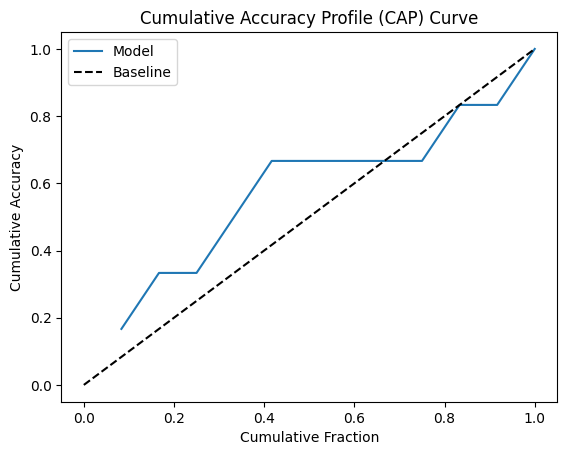

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [6]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 17:] = sc.fit_transform(X_train[:, 17:])
X_test[:, 17:] = sc.transform(X_test[:, 17:])

classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[39  7]
 [14  4]]
Accuracy:  0.671875
Precision:  0.5497427101200686
Recall:  0.5350241545893719
F1 Score:  0.5318704284221525


In [7]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [8]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x57: 0.09960784313725496
remainder__x50: 0.04666666666666671
remainder__x45: 0.04352941176470594
remainder__x37: 0.040392156862745145
remainder__x42: 0.03882352941176477
remainder__x35: 0.0325490196078432
remainder__x41: 0.026274509803921608
encoder__x3_night: 0.025882352941176502
remainder__x49: 0.020784313725490243
remainder__x9: 0.019607843137254943
encoder__x3_afternoon: 0.018039215686274555
encoder__x7_near-hit: 0.01764705882352946
remainder__x51: 0.01764705882352946
remainder__x53: 0.01764705882352946
remainder__x34: 0.01647058823529418
remainder__x0: 0.013333333333333397
remainder__x8: 0.013333333333333397
remainder__x46: 0.013333333333333386
remainder__x30: 0.01294117647058829
remainder__x58: 0.011372549019607903
remainder__x26: 0.010980392156862816
remainder__x5: 0.010196078431372612
remainder__x39: 0.009803921568627517
remainder__x36: 0.00941176470588242
remainder__x18: 0.008627450980392215
remainder__x43: 0.007843137254902021
encoder__x1_Baby Boomers: 0.0074509803

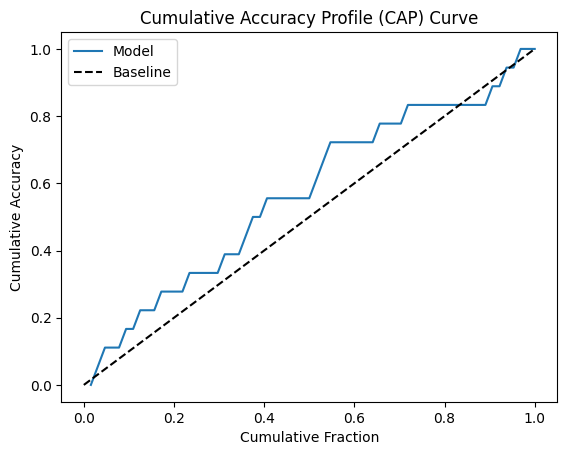

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()